# 2nd Individual Assignment in Image and Video Technology and Analysis  
## **Theoretical Part**

### Comparative Table of Architectural Parameters

| **Characteristic**              | **LeNet (LeCun et al., 1989)**                                                                                                                                     | **AlexNet (Krizhevsky et al., 2012)**                                                                                                                                                                     | **VGG (Simonyan & Zisserman, 2014)**                                                                                                                                                                |
|----------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Number of Layers**             | ~7 layers: 3 convolutional + 2 subsampling/average pooling layers + 2 fully connected layers (including output).                                                  | 8 layers: 5 convolutional layers (with max pooling after some of them) and 3 fully connected layers.                                                                                                     | 16 or 19 layers (e.g., VGG‑16 or VGG‑19): Typically 13 convolutional layers + 3 fully connected layers.                                                                                              |
| **Filter Size**                 | Typically 5×5 filters in each convolutional layer.                                                                                                                | - Layer 1: 11×11 filters (stride 4).<br>- Layer 2: 5×5 filters.<br>- Layers 3, 4, 5: 3×3 filters (with appropriate padding to maintain spatial resolution).                                             | All filters are 3×3. Stacking small filters at great depth creates a larger effective receptive field with fewer parameters.                                                                        |
| **Activation Function**         | Uses tanh (or related sigmoidal functions), which were common at that time.                                                                                        | ReLU, which accelerates training and helps address the vanishing gradient problem.                                                                                                                       | ReLU for all hidden layers, leveraging multiple nonlinearities in a very deep network.                                                                                                               |
| **Number of Parameters**        | About 60,000 parameters. <br>(Sufficient for simple tasks like handwritten digit recognition.)                                                                      | About 60 million parameters. <br>(High capacity for learning complex features from large datasets such as ImageNet.)                                                                                     | About 138–144 million parameters (depending on the variant). <br>(Uniform small filters and large depth contribute to excellent classification, though requiring high computational resources.)     |
| **Pooling Techniques**          | Uses subsampling layers (average or other methods) that reduce spatial resolution. <br>(Does not use max pooling as in newer implementations.)                     | Uses max pooling after certain convolutional layers (e.g., after the 1st, 2nd, and 5th convolutional layers) to reduce spatial dimension and add robustness to small translations.                        | Uses max pooling (usually with 2×2 window and stride 2) after groups of convolutional layers for gradual reduction in dimensions and to capture contextual features.                                 |
| **Dropout Techniques**          | Not applied (the technique had not been introduced at that time).                                                                                                 | Applied to fully connected layers (with a probability of about 0.5) to reduce overfitting.                                                                                                                | Applied to the first two fully connected layers (dropout ratio 0.5) to improve generalization despite the network’s high capacity.                                                                   |

### Performance Commentary

- **LeNet:**  
  This network was designed for handwritten digit recognition, with a simple architecture and a small number of parameters. For low-complexity tasks, it performs very well, but it does not scale adequately to more complex problems.

- **AlexNet:**  
  With significantly more parameters and a deeper structure, AlexNet introduced ReLU and dropout, offering major improvements in learning features from large datasets such as ImageNet. The use of max pooling helps reduce spatial dimensions and create features that are robust to small translations.

- **VGG:**  
  The approach of using only small (3×3) filters in a very deep network (16 to 19 layers) enables the gradual extraction of rich features, leading to better classification performance. Despite the high parameter count, the uniformity of the architecture (convolutions, max pooling, and dropout application) improves generalization, though it demands more computational resources and training time.


## Introduction and Overview of the Dataset


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [ ]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Each team will work with a different subset of the dataset.  
In the next cell, replace the value of the variable `team_seed` with the number corresponding to your team.


In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 141

In [ ]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

We create our team's unique dataset:


In [ ]:
# (Mine) Helper cell to open the url because I had a problem

import requests
from io import StringIO

url = "https://pastebin.com/raw/nzE1n98V"
response = requests.get(url)
data = StringIO(response.text)
team_classes = pd.read_csv(data, sep=',', header=None)


In [ ]:
# (Mine) Helper cell 2 for the second url
url_labels = "https://pastebin.com/raw/qgDaNggt"
response_labels = requests.get(url_labels)
data_labels = StringIO(response_labels.text)
CIFAR100_LABELS_LIST = pd.read_csv(data_labels, sep=',', header=None).astype(str).values.tolist()[0]

In [ ]:
#team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
#CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)

[' beaver', ' bowl', ' boy', ' bus', ' camel', ' castle', ' chimpanzee', ' crab', ' dinosaur', ' lawn_mower', ' lion', ' oak_tree', ' orange', ' orchid', ' palm_tree', ' porcupine', ' rabbit', ' tulip', ' turtle', ' woman']


In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


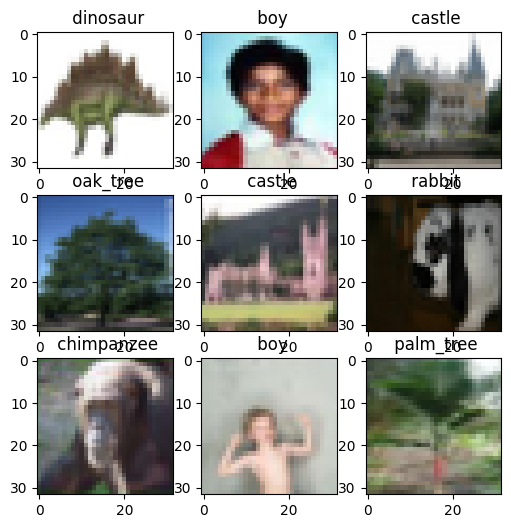

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

## Question 1
---
### Step 1: Design and Train the Models

Design and train the **LeNet, AlexNet, and VGG** models, as well as your own model (e.g., name it **MyCNN**) using the same [optimizer](https://keras.io/api/optimizers/), the same [loss function](https://keras.io/api/losses/), the same batch size, and 50 epochs `*`.

For evaluating the performance of the models, use F1-score as the [metric](https://keras.io/api/metrics/).

`*`  
You may experiment with the optimizer, loss function, and batch size for the 4 models before finalizing your common choice for all of them.

---

### Step 2: Model Evaluation

a. For each of the models you trained in Step 1, plot a common chart showing the training and validation F1-scores across all epochs.

b. Evaluate and discuss your results in detail with respect to the following:
 - Effect of the number of data samples/classes.
 - Effect of the optimization algorithm (optimizer).
 - Effect of batch size.

---

### Step 3: F1-score Evaluation

Evaluate the F1-scores using your test set.

---

## Question 2
---
### Step 1: Overfitting Control

For your own model (**MyCNN**) only, try different combinations of the following techniques to control overfitting and help your model generalize better:

- [Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout)

- [Data Augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), using [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)

---

### Step 2: Evaluation

Evaluate your results based on the F1-score for both the validation set and the test set.

---

## Question 3
---
### Step 1: Transfer Learning

Apply **transfer learning** to your own model (**MyCNN**), the one you evaluated as best based on F1-score for handling overfitting.

For transfer learning, use [VGG19](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19) and [EfficientNetB0](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0) as source models.

a. “Freeze” the convolutional base and train only the classification head (set `trainable = False`).

b. Train only a portion of the layers near the output of the network. Here, `trainable` flags should be set per layer.

---

### Step 2: Evaluation

Evaluate your results based on the F1-score for both the validation set and the test set.

---

## Memory Management (TFRecord)

Loading data the way we did above in the simple implementation example is very convenient, but it's not memory-efficient. Specifically, this approach stores the data directly in variables, which together occupy the CPU or GPU RAM. This makes it impossible to handle large datasets or apply transformations like data augmentation.

To work around this problem, we can serialize the data and store it in medium-sized files (a few MB), which can be read sequentially.

The TFRecord format allows storing a series of binary records. Read more about [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) and [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data).

Note that with this method, you need to import `tensorflow_datasets` and use `tfds.load` to save the dataset in tfrecord files on disk (see [this example](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb)). Of course, we can also convert raw data (e.g., jpg files) to tfrecord format, as shown [here](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).


# Preproccessing

In [ ]:
# 0) First, split x_train_ds into new x_train and x_val
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Validation Set (x_val_ds, y_val_ds)
x_val_ds = x_train_ds[-val_size:]
y_val_ds = y_train_ds[-val_size:]

# New Training Set (x_train_ds, y_train_ds)
x_train_ds = x_train_ds[:-val_size]
y_train_ds = y_train_ds[:-val_size]

# The test set remains the same
x_test_ds = x_test_ds
y_test_ds = y_test_ds

# 1) Normalize to [0,1] (float32)
x_train = (x_train_ds.astype('float32') / 255.0)
x_val   = (x_val_ds.astype('float32')   / 255.0)
x_test  = (x_test_ds.astype('float32')  / 255.0)

# 2) Remap labels to [0, 19]
class_to_new = {orig: new_idx for new_idx, orig in enumerate(our_index)}

y_train = np.array([class_to_new[int(y)] for y in y_train_ds], dtype='int32')
y_val   = np.array([class_to_new[int(y)] for y in y_val_ds],   dtype='int32')
y_test  = np.array([class_to_new[int(y)] for y in y_test_ds],  dtype='int32')

# 3) Check shapes and unique labels
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

print("Unique train labels:", np.unique(y_train))
print("Unique val labels:", np.unique(y_val))
print("Unique test labels:", np.unique(y_test))



Train: X=(8500, 32, 32, 3), y=(8500,)
Validation: X=(1500, 32, 32, 3), y=(1500,)
Test: X=(2000, 32, 32, 3), y=(2000,)
Unique train labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Unique val labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Unique test labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


<ipython-input-13-e61c4c82b95a>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = np.array([class_to_new[int(y)] for y in y_train_ds], dtype='int32')
<ipython-input-13-e61c4c82b95a>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_val   = np.array([class_to_new[int(y)] for y in y_val_ds],   dtype='int32')
<ipython-input-13-e61c4c82b95a>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test  = np.array([class_to_new[int(y)] for y in y_test_ds],  dtyp

# F1-score class (callback)

In [ ]:
# Import required libraries
import tensorflow as tf
import numpy as np
from sklearn.metrics import f1_score

class F1ScoreCallback(tf.keras.callbacks.Callback):
    """
    Custom Callback for computing and storing F1-score on Training and Validation sets at each epoch.
    """
    def __init__(self, x_train, y_train, x_val, y_val, batch_size=64):
        super(F1ScoreCallback, self).__init__()
        self.x_train = x_train
        self.y_train = y_train.squeeze()
        self.x_val = x_val
        self.y_val = y_val.squeeze()
        self.batch_size = batch_size
        self.train_f1_scores = []
        self.val_f1_scores = []

    def on_epoch_end(self, epoch, logs=None):
        # Predictions on the training set
        y_train_pred = self.model.predict(self.x_train, batch_size=self.batch_size)
        y_train_pred_classes = np.argmax(y_train_pred, axis=1)
        train_f1 = f1_score(self.y_train, y_train_pred_classes, average='macro')
        self.train_f1_scores.append(train_f1)

        # Predictions on the validation set
        y_val_pred = self.model.predict(self.x_val, batch_size=self.batch_size)
        y_val_pred_classes = np.argmax(y_val_pred, axis=1)
        val_f1 = f1_score(self.y_val, y_val_pred_classes, average='macro')
        self.val_f1_scores.append(val_f1)

        # Print F1-score at each epoch
        print(f"Epoch {epoch+1}: Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}")



# LeNet

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1: Train F1: 0.0047, Val F1: 0.0049
133/133 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 3.0344 - sparse_categorical_accuracy: 0.0484 - val_loss: 3.0075 - val_sparse_categorical_accuracy: 0.0513
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 2: Train F1: 0.0461, Val F1: 0.0441
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.0028 - sparse_categorical_accuracy: 0.0479 - val_loss: 2.9266 - val_sparse_categorical_accuracy: 0.1053
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 3: Train F1: 0.1068, Val F1: 0.1024
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8328 - sparse_categorical_accuracy: 0.1255 - val_loss: 2.6582 - val_sparse_categorical_accuracy: 0.1647
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 4: Train F1: 0.1739, Val F1: 0.1

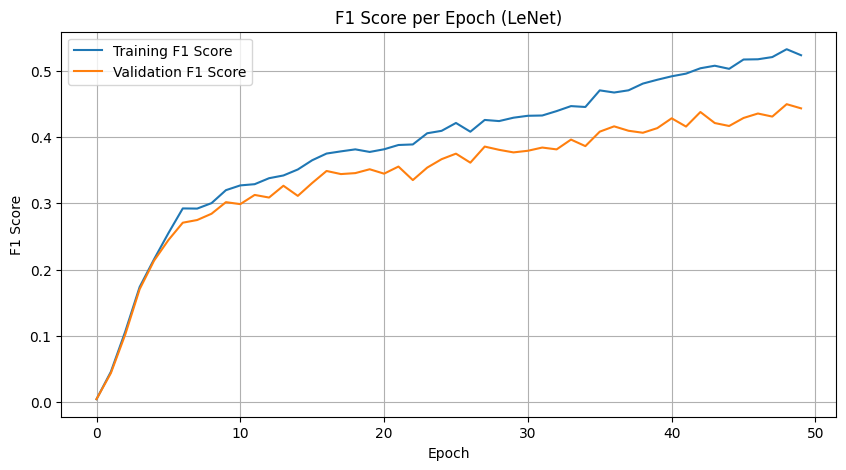

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Final Test F1 Score (LeNet): 0.4338


In [ ]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import numpy as np

# Define LeNet-5
class LeNet(tf.keras.Model):
    """LeNet-5 Sequential model for CIFAR-100 subset."""
    def __init__(self, num_classes=20):
        super().__init__()
        self.net = tf.keras.Sequential([
            tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same'),
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'),
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(120, activation='sigmoid'),
            tf.keras.layers.Dense(84, activation='sigmoid'),
            tf.keras.layers.Dense(num_classes)  # No softmax, logits output
        ])

    def call(self, x):
        return self.net(x)

# Create the model
lenet_model = LeNet(num_classes=20)

# Define optimizer, loss, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Common optimizer for all models
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

# Compile
lenet_model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

# Create F1 Callback
f1_callback = F1ScoreCallback(x_train, y_train, x_val, y_val, batch_size=64)

# Training
history = lenet_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[f1_callback],
    verbose=1
)

# Plot F1-Score curves
plt.figure(figsize=(10,5))
plt.plot(f1_callback.train_f1_scores, label='Training F1 Score')
plt.plot(f1_callback.val_f1_scores, label='Validation F1 Score')
plt.title('F1 Score per Epoch (LeNet)')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

# Compute F1-score on the test set
y_test_pred = lenet_model.predict(x_test, batch_size=64)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
test_f1 = f1_score(y_test.squeeze(), y_test_pred_classes, average='macro')
print(f"Final Test F1 Score (LeNet): {test_f1:.4f}")



# AlexNet

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
Epoch 1: Train F1: 0.1449, Val F1: 0.1287
133/133 ━━━━━━━━━━━━━━━━━━━━ 43s 242ms/step - loss: 3.1644 - sparse_categorical_accuracy: 0.0899 - val_loss: 2.5360 - val_sparse_categorical_accuracy: 0.1760
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Epoch 2: Train F1: 0.2697, Val F1: 0.2595
133/133 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - loss: 2.4257 - sparse_categorical_accuracy: 0.2289 - val_loss: 2.2680 - val_sparse_categorical_accuracy: 0.3033
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Epoch 3: Train F1: 0.3025, Val F1: 0.2788
133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - loss: 2.2233 - sparse_categorical_accuracy: 0.3026 - val_loss: 2.2007 - val_sparse_categorical_accuracy: 0.3040
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Epoch 4: Train F1: 0.4214, Va

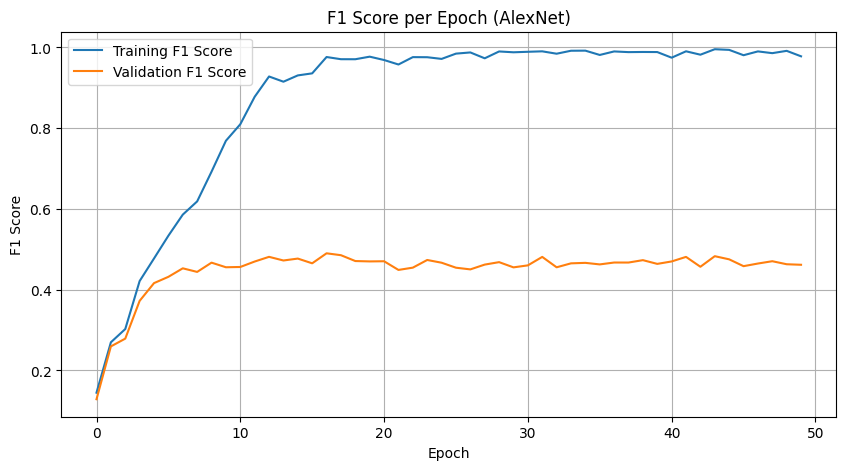

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step
Final Test F1 Score (AlexNet): 0.4583


In [ ]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import numpy as np

# Define AlexNet
class AlexNet(tf.keras.Model):
    """AlexNet Sequential model with dynamic resizing for 20 classes."""
    def __init__(self, num_classes=20):
        super().__init__()
        self.net = tf.keras.Sequential([
            tf.keras.layers.Resizing(224, 224),
            tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu', padding='valid'),
            tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
            tf.keras.layers.Conv2D(filters=256, kernel_size=5, activation='relu', padding='same'),
            tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
            tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation='relu', padding='same'),
            tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation='relu', padding='same'),
            tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
            tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(4096, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(4096, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(num_classes)
        ])

    def call(self, x):
        return self.net(x)

# Create the AlexNet model
alexnet_model = AlexNet(num_classes=20)

# Compile with common optimizer/loss
alexnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# Create the F1 Callback
f1_callback_alexnet = F1ScoreCallback(x_train, y_train, x_val, y_val, batch_size=64)

# Train the model
history = alexnet_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[f1_callback_alexnet],
    verbose=1
)

# Plot F1-Score curves
plt.figure(figsize=(10,5))
plt.plot(f1_callback_alexnet.train_f1_scores, label='Training F1 Score')
plt.plot(f1_callback_alexnet.val_f1_scores, label='Validation F1 Score')
plt.title('F1 Score per Epoch (AlexNet)')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

# Compute F1-score on the test set
y_test_pred = alexnet_model.predict(x_test, batch_size=64)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
test_f1 = f1_score(y_test.squeeze(), y_test_pred_classes, average='macro')
print(f"Final Test F1 Score (AlexNet): {test_f1:.4f}")


# VGG

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step
Epoch 1: Train F1: 0.2559, Val F1: 0.2392
133/133 ━━━━━━━━━━━━━━━━━━━━ 128s 761ms/step - loss: 3.1078 - sparse_categorical_accuracy: 0.1035 - val_loss: 2.3471 - val_sparse_categorical_accuracy: 0.2753
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
Epoch 2: Train F1: 0.3453, Val F1: 0.3175
133/133 ━━━━━━━━━━━━━━━━━━━━ 68s 380ms/step - loss: 2.2060 - sparse_categorical_accuracy: 0.3086 - val_loss: 2.1210 - val_sparse_categorical_accuracy: 0.3533
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
Epoch 3: Train F1: 0.4437, Val F1: 0.3942
133/133 ━━━━━━━━━━━━━━━━━━━━ 82s 380ms/step - loss: 1.9825 - sparse_categorical_accuracy: 0.3817 - val_loss: 1.9354 - val_sparse_categorical_accuracy: 0.4053
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
Epoch 4: Train F1: 0.4

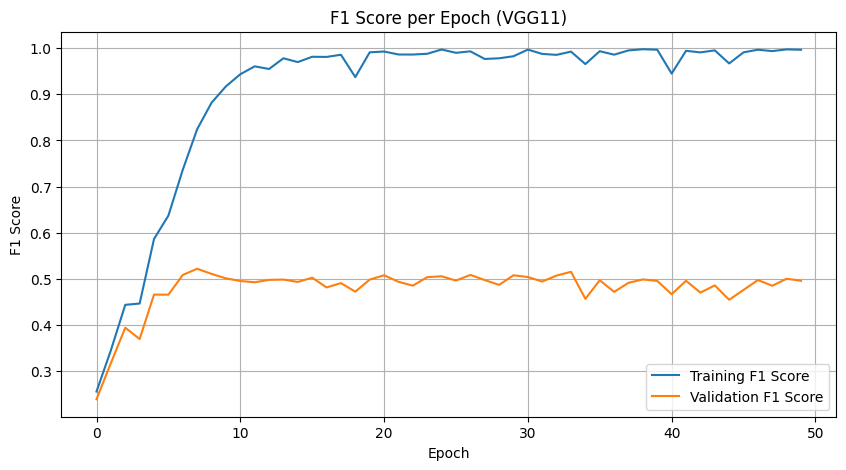

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step
Final Test F1 Score (VGG11): 0.5038


In [ ]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import numpy as np

# Define VGG11
class VGG11(tf.keras.Model):
    """VGG11 Sequential model with dynamic resizing for 20 classes."""
    def __init__(self, num_classes=20):
        super().__init__()
        self.net = tf.keras.Sequential([
            tf.keras.layers.Resizing(224, 224),
            tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(512, kernel_size=3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(512, kernel_size=3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(4096, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(4096, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(num_classes)
        ])

    def call(self, x):
        return self.net(x)

# Create the VGG11 model
vgg11_model = VGG11(num_classes=20)

# Compile with common optimizer/loss
vgg11_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# Create the F1 Callback
f1_callback_vgg11 = F1ScoreCallback(x_train, y_train, x_val, y_val, batch_size=64)

# Train the model
history = vgg11_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[f1_callback_vgg11],
    verbose=1
)

# Plot F1-Score curves
plt.figure(figsize=(10,5))
plt.plot(f1_callback_vgg11.train_f1_scores, label='Training F1 Score')
plt.plot(f1_callback_vgg11.val_f1_scores, label='Validation F1 Score')
plt.title('F1 Score per Epoch (VGG11)')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

# Compute F1-score on the test set
y_test_pred = vgg11_model.predict(x_test, batch_size=64)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
test_f1 = f1_score(y_test.squeeze(), y_test_pred_classes, average='macro')
print(f"Final Test F1 Score (VGG11): {test_f1:.4f}")


#MyCNN

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Epoch 1: Train F1: 0.4035, Val F1: 0.3670
133/133 ━━━━━━━━━━━━━━━━━━━━ 42s 227ms/step - loss: 3.1768 - sparse_categorical_accuracy: 0.1794 - val_loss: 2.0403 - val_sparse_categorical_accuracy: 0.3760
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Epoch 2: Train F1: 0.5106, Val F1: 0.4379
133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - loss: 1.8478 - sparse_categorical_accuracy: 0.4406 - val_loss: 1.7504 - val_sparse_categorical_accuracy: 0.4507
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Epoch 3: Train F1: 0.5949, Val F1: 0.4819
133/133 ━━━━━━━━━━━━━━━━━━━━ 23s 135ms/step - loss: 1.5658 - sparse_categorical_accuracy: 0.5183 - val_loss: 1.6538 - val_sparse_categorical_accuracy: 0.4933
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Epoch 4: Train F1: 0.6515, V

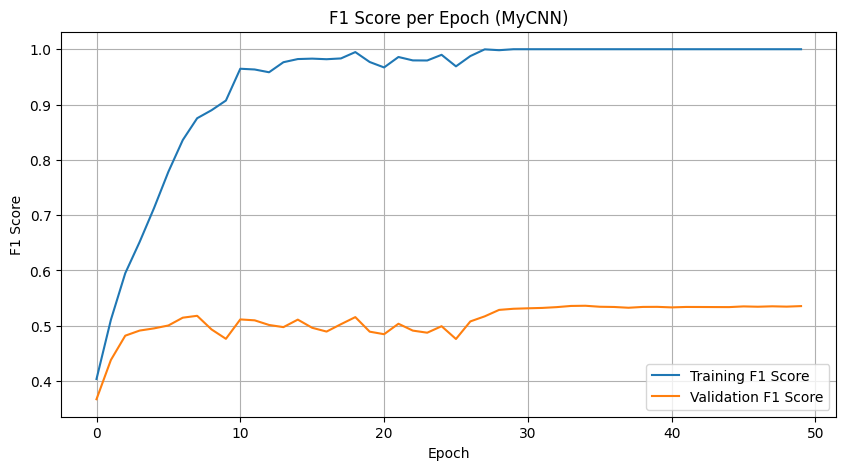

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
Final Test F1 Score (MyCNN): 0.5157


In [ ]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import numpy as np

# Define MyCNN (with dynamic resizing 224x224)
class MyCNN(tf.keras.Model):
    """MyCNN - small, lightweight network for CIFAR-100 subset (224x224)"""
    def __init__(self, num_classes=20):
        super().__init__()
        self.net = tf.keras.Sequential([
            tf.keras.layers.Resizing(224, 224),  # Add dynamic resize layer
            tf.keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(num_classes)  # logits output
        ])

    def call(self, x):
        return self.net(x)

# Create the MyCNN model
mycnn_model = MyCNN(num_classes=20)

# Compile with common optimizer/loss
mycnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# Create the F1 Callback
f1_callback_mycnn = F1ScoreCallback(x_train, y_train, x_val, y_val, batch_size=64)

# Train the model
history = mycnn_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[f1_callback_mycnn],
    verbose=1
)

# Plot F1-Score curves
plt.figure(figsize=(10,5))
plt.plot(f1_callback_mycnn.train_f1_scores, label='Training F1 Score')
plt.plot(f1_callback_mycnn.val_f1_scores, label='Validation F1 Score')
plt.title('F1 Score per Epoch (MyCNN)')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

# Compute F1-score on the test set
y_test_pred = mycnn_model.predict(x_test, batch_size=64)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
test_f1 = f1_score(y_test.squeeze(), y_test_pred_classes, average='macro')
print(f"Final Test F1 Score (MyCNN): {test_f1:.4f}")


### Step 2b: Detailed Evaluation of Results

**Effect of Data/Class Count**  
All models were trained on 20 classes from the CIFAR-100 dataset.  
- **LeNet**, although simple, reached **training F1 ≈ 0.52** and **validation F1 ≈ 0.44** by the end, showing limited capacity to learn many classes.
- **AlexNet** reached **training F1 ≈ 0.97–0.99**, while **validation F1 ≈ 0.46–0.48**, clearly indicating significant overfitting.
- **VGG11** showed similar behavior: **training F1 ≈ 0.99**, **validation F1 ≈ 0.50–0.51**, also with overfitting.
- **MyCNN** achieved **training F1 ≈ 1.0 (!) as early as epoch 29**, while **validation F1 stabilized around 0.53–0.54**: the best fit overall, though still showing signs of overfitting.

**Conclusion:**  
The more complex and powerful the network, the better it learns the training set perfectly (see MyCNN, VGG11, AlexNet), but this **does not necessarily translate to better validation performance**. Thus, the number of classes imposes a limit, and generalization ability depends on the architecture—not just the fit quality.

---

**Effect of the Optimization Algorithm (Optimizer)**  
All models used **Adam**.  
- Adam led to very fast convergence (especially in large networks), but without proper regularization (e.g., dropout, weight decay), we observed a **huge gap between training and validation F1** (AlexNet, VGG11, MyCNN).
- LeNet, being more limited, did not show the same issue: training F1 increased more slowly, but validation F1 rose closer (≈0.44).

**Conclusion:**  
Adam alone does not prevent overfitting — in large networks, it must be combined with regularization techniques.

---

**Effect of Batch Size**  
A **batch size of 64** was used across all models.  
- For LeNet, the small network, batch size didn’t play a major role.
- In large networks (AlexNet, VGG11, MyCNN), batch size 64 was sufficient for stable training, but the rapid rise of training F1 suggests that **larger batch sizes might have led to gentler adaptation** and less noisy gradients.
- However, overfitting is mainly a matter of model capacity, not batch size, so changing the size alone would not resolve the problem.

---

### Step 3: F1-Score Evaluation on the Test Set

| Model     | Test F1-score |
|-----------|---------------|
| LeNet     | **0.4338**    |
| AlexNet   | **0.4583**    |
| VGG11     | **0.5038**    |
| MyCNN     | **0.5157**    |

**Conclusions:**  
- Despite overfitting in the large networks, **VGG11** and **MyCNN** ultimately achieve better test F1-scores than the others.
- **MyCNN** achieves slightly better generalization than VGG11, thanks to its custom design.
- **LeNet** lags behind, as expected, due to its simple architectural design.


# Question 2


##MyCNN with dropout 0.3

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Epoch 1: Train F1: 0.4353, Val F1: 0.3793
133/133 ━━━━━━━━━━━━━━━━━━━━ 41s 214ms/step - loss: 2.8446 - sparse_categorical_accuracy: 0.2030 - val_loss: 1.9578 - val_sparse_categorical_accuracy: 0.3927
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Epoch 2: Train F1: 0.5306, Val F1: 0.4592
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - loss: 1.7811 - sparse_categorical_accuracy: 0.4565 - val_loss: 1.7000 - val_sparse_categorical_accuracy: 0.4720
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Epoch 3: Train F1: 0.6280, Val F1: 0.4968
133/133 ━━━━━━━━━━━━━━━━━━━━ 19s 140ms/step - loss: 1.4854 - sparse_categorical_accuracy: 0.5356 - val_loss: 1.5753 - val_sparse_categorical_accuracy: 0.5067
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Epoch 4: Train F1: 0.7369, V

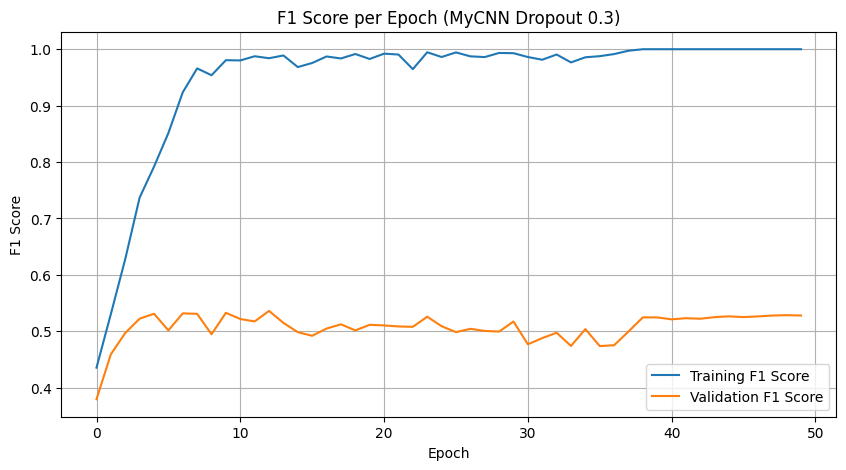

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
Final Test F1 Score (MyCNN Dropout 0.3): 0.5280


In [ ]:
# MyCNN with Dropout 0.3
class MyCNN_Dropout03(tf.keras.Model):
    def __init__(self, num_classes=20):
        super().__init__()
        self.net = tf.keras.Sequential([
            tf.keras.layers.Resizing(224, 224),
            tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(num_classes)
        ])

    def call(self, x):
        return self.net(x)

# Compile
model_03 = MyCNN_Dropout03(num_classes=20)
model_03.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# F1 callback
f1_callback_03 = F1ScoreCallback(x_train, y_train, x_val, y_val, batch_size=64)

# Fit
history_03 = model_03.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[f1_callback_03],
    verbose=1
)

# Plot curves
plt.figure(figsize=(10, 5))
plt.plot(f1_callback_03.train_f1_scores, label='Training F1 Score')
plt.plot(f1_callback_03.val_f1_scores, label='Validation F1 Score')
plt.title('F1 Score per Epoch (MyCNN Dropout 0.3)')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

# Test F1 score
y_test_pred_03 = model_03.predict(x_test, batch_size=64)
y_test_pred_classes_03 = np.argmax(y_test_pred_03, axis=1)
test_f1_03 = f1_score(y_test.squeeze(), y_test_pred_classes_03, average='macro')
print(f"Final Test F1 Score (MyCNN Dropout 0.3): {test_f1_03:.4f}")



##MyCNN with dropout 0.7

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Epoch 1: Train F1: 0.4242, Val F1: 0.3965
133/133 ━━━━━━━━━━━━━━━━━━━━ 39s 212ms/step - loss: 2.9944 - sparse_categorical_accuracy: 0.2054 - val_loss: 1.9617 - val_sparse_categorical_accuracy: 0.4160
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Epoch 2: Train F1: 0.5283, Val F1: 0.4460
133/133 ━━━━━━━━━━━━━━━━━━━━ 18s 138ms/step - loss: 1.7621 - sparse_categorical_accuracy: 0.4564 - val_loss: 1.7827 - val_sparse_categorical_accuracy: 0.4440
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Epoch 3: Train F1: 0.6276, Val F1: 0.5017
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - loss: 1.4548 - sparse_categorical_accuracy: 0.5510 - val_loss: 1.6281 - val_sparse_categorical_accuracy: 0.5033
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Epoch 4: Train F1: 0.6834, V

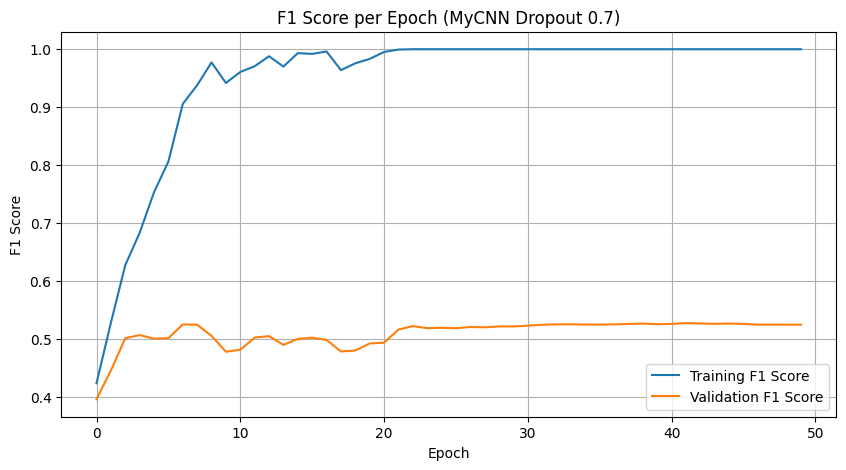

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
Final Test F1 Score (MyCNN Dropout 0.7): 0.5368


In [ ]:
# MyCNN with Dropout 0.7
class MyCNN_Dropout07(tf.keras.Model):
    def __init__(self, num_classes=20):
        super().__init__()
        self.net = tf.keras.Sequential([
            tf.keras.layers.Resizing(224, 224),
            tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(0.7),
            tf.keras.layers.Dense(num_classes)
        ])

    def call(self, x):
        return self.net(x)

# Compile
model_07 = MyCNN_Dropout07(num_classes=20)
model_07.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# F1 callback
f1_callback_07 = F1ScoreCallback(x_train, y_train, x_val, y_val, batch_size=64)

# Fit
history_07 = model_07.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[f1_callback_07],
    verbose=1
)

# Plot curves
plt.figure(figsize=(10, 5))
plt.plot(f1_callback_07.train_f1_scores, label='Training F1 Score')
plt.plot(f1_callback_07.val_f1_scores, label='Validation F1 Score')
plt.title('F1 Score per Epoch (MyCNN Dropout 0.7)')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

# Test F1 score
y_test_pred_07 = model_07.predict(x_test, batch_size=64)
y_test_pred_classes_07 = np.argmax(y_test_pred_07, axis=1)
test_f1_07 = f1_score(y_test.squeeze(), y_test_pred_classes_07, average='macro')
print(f"Final Test F1 Score (MyCNN Dropout 0.7): {test_f1_07:.4f}")


### Evaluation of Different Dropout Rates

| Dropout | Final Test F1 Score |
|---------|---------------------|
| 0.3     | 0.5280              |
| 0.5     | 0.5157              |
| 0.7     | 0.5368              |

---

### Comments

**The highest dropout (0.7)** yielded the best F1 score on the test set (0.5368), albeit slightly.  
The smallest dropout (0.3) came in second (0.5280).  
The initial dropout (0.5) had the lowest performance (0.5157).

We also observe that in all setups, the training F1 score reaches almost 1.0000, while the validation F1 stagnates around 0.52–0.53, indicating signs of overfitting. Therefore, **dropout helps but does not fully solve the problem**.

---

### Conclusion

- A higher dropout rate seems slightly more stable in this case.
- However, dropout alone will not lead to significant improvement — we likely need to move forward with **data augmentation** to enhance generalization.


# Testing data augmentation

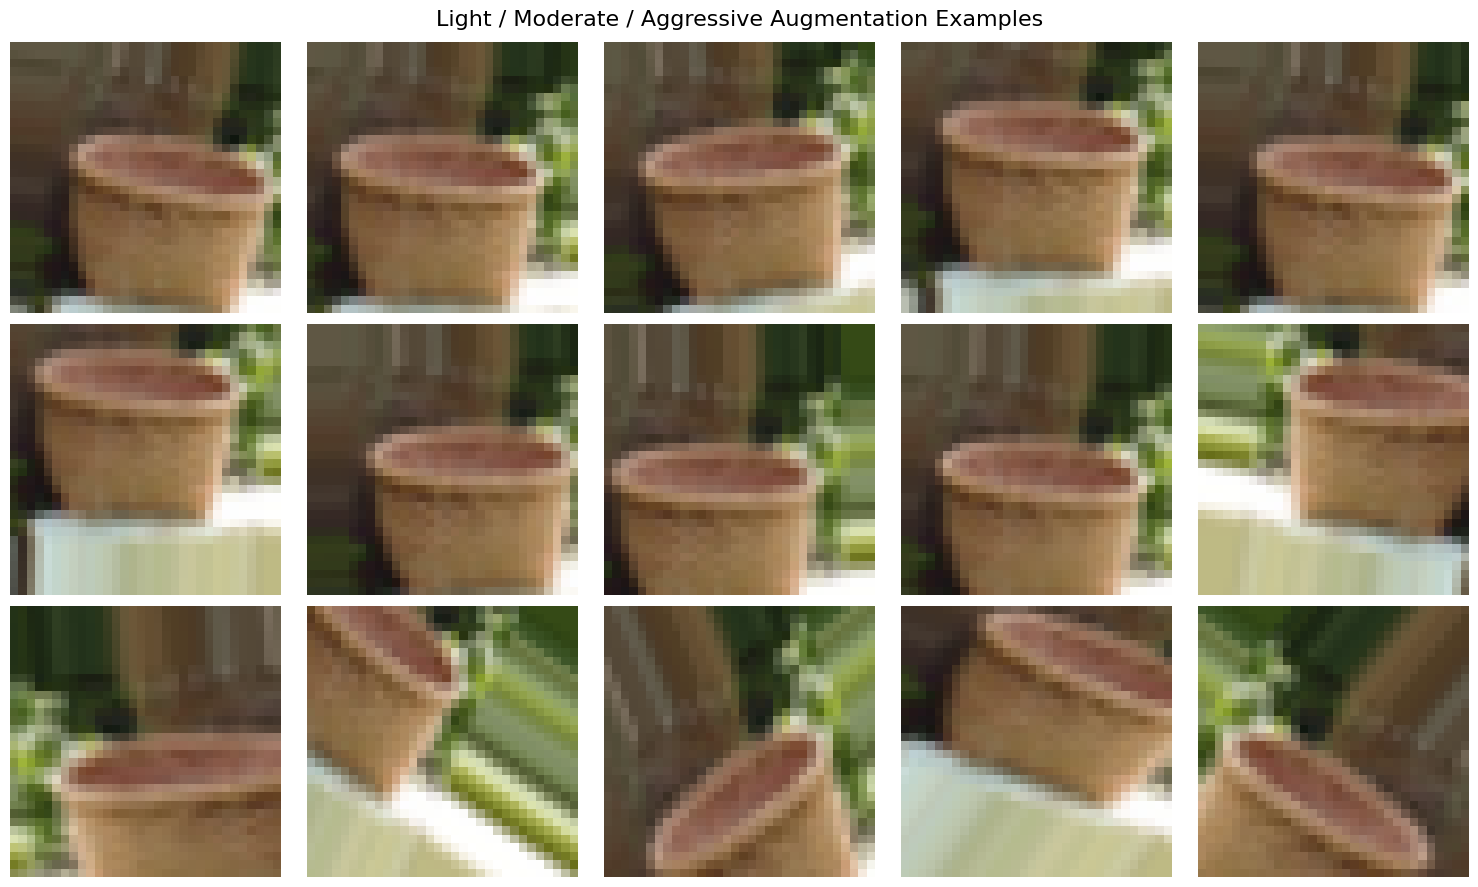

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Select a random image from x_train
idx = np.random.randint(0, len(x_train))
sample_img = x_train[idx]
sample_img = np.expand_dims(sample_img, 0)  # add batch dimension

# Define three ImageDataGenerators
light_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10, width_shift_range=0.1, height_shift_range=0.1
)
moderate_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True
)
aggressive_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40, width_shift_range=0.3, height_shift_range=0.3,
    horizontal_flip=True, zoom_range=0.3
)

# Create generators
light_gen = light_datagen.flow(sample_img, batch_size=1)
moderate_gen = moderate_datagen.flow(sample_img, batch_size=1)
aggressive_gen = aggressive_datagen.flow(sample_img, batch_size=1)

# Plot
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('Light / Moderate / Aggressive Augmentation Examples', fontsize=16)

for i in range(5):
    # Light
    aug_img = next(light_gen)[0]
    aug_img_uint8 = np.clip(aug_img * 255, 0, 255).astype('uint8')
    axes[0, i].imshow(aug_img_uint8)
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_ylabel('Light', fontsize=14)

    # Moderate
    aug_img = next(moderate_gen)[0]
    aug_img_uint8 = np.clip(aug_img * 255, 0, 255).astype('uint8')
    axes[1, i].imshow(aug_img_uint8)
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_ylabel('Moderate', fontsize=14)

    # Aggressive
    aug_img = next(aggressive_gen)[0]
    aug_img_uint8 = np.clip(aug_img * 255, 0, 255).astype('uint8')
    axes[2, i].imshow(aug_img_uint8)
    axes[2, i].axis('off')
    if i == 0:
        axes[2, i].set_ylabel('Aggressive', fontsize=14)

plt.tight_layout()
plt.show()


#Light Augmentation + Dropout 0.7

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Epoch 1: Train F1: 0.3993, Val F1: 0.3624
133/133 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - loss: 2.8649 - sparse_categorical_accuracy: 0.1912 - val_loss: 1.9904 - val_sparse_categorical_accuracy: 0.3847
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Epoch 2: Train F1: 0.4817, Val F1: 0.4413
133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - loss: 1.9083 - sparse_categorical_accuracy: 0.4232 - val_loss: 1.7594 - val_sparse_categorical_accuracy: 0.4593
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Epoch 3: Train F1: 0.5259, Val F1: 0.4610
133/133 ━━━━━━━━━━━━━━━━━━━━ 22s 138ms/step - loss: 1.7394 - sparse_categorical_accuracy: 0.4694 - val_loss: 1.7017 - val_sparse_categorical_accuracy: 0.4687
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Epoch 4: Train F1: 0.5784, V

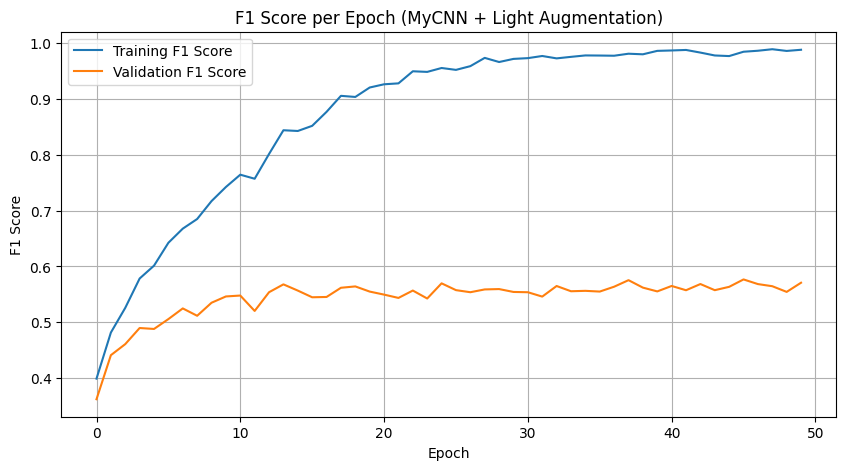

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step
Final Test F1 Score (MyCNN + Light Augmentation): 0.5528


In [ ]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

# Define model class
class MyCNN(tf.keras.Model):
    def __init__(self, num_classes=20, dropout_rate=0.7):
        super().__init__()
        self.net = tf.keras.Sequential([
            tf.keras.layers.Resizing(224, 224),
            tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(num_classes)
        ])

    def call(self, x):
        return self.net(x)

# Light augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Train generator (use repeat to avoid running out of data)
train_generator = datagen.flow(x_train, y_train, batch_size=64)

# Calculate correct steps_per_epoch
steps_per_epoch = np.ceil(len(x_train) / 64).astype(int)

# Compile model
model = MyCNN(num_classes=20, dropout_rate=0.7)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# F1 callback
f1_callback = F1ScoreCallback(x_train, y_train, x_val, y_val, batch_size=64)

# Fit
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[f1_callback],
    verbose=1
)

# Plot F1 curves
plt.figure(figsize=(10, 5))
plt.plot(f1_callback.train_f1_scores, label='Training F1 Score')
plt.plot(f1_callback.val_f1_scores, label='Validation F1 Score')
plt.title('F1 Score per Epoch (MyCNN + Light Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

# Test F1 score
y_test_pred = model.predict(x_test, batch_size=64)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
test_f1 = f1_score(y_test.squeeze(), y_test_pred_classes, average='macro')
print(f"Final Test F1 Score (MyCNN + Light Augmentation): {test_f1:.4f}")


#Moderate Augmentation + Dropout 0.7

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Epoch 1: Train F1: 0.3616, Val F1: 0.3326
133/133 ━━━━━━━━━━━━━━━━━━━━ 37s 230ms/step - loss: 2.8338 - sparse_categorical_accuracy: 0.1772 - val_loss: 2.0629 - val_sparse_categorical_accuracy: 0.3553
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Epoch 2: Train F1: 0.4380, Val F1: 0.4033
133/133 ━━━━━━━━━━━━━━━━━━━━ 24s 119ms/step - loss: 2.0700 - sparse_categorical_accuracy: 0.3684 - val_loss: 1.8840 - val_sparse_categorical_accuracy: 0.4080
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Epoch 3: Train F1: 0.4828, Val F1: 0.4452
133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - loss: 1.8820 - sparse_categorical_accuracy: 0.4151 - val_loss: 1.7250 - val_sparse_categorical_accuracy: 0.4573
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Epoch 4: Train F1: 0.4875, V

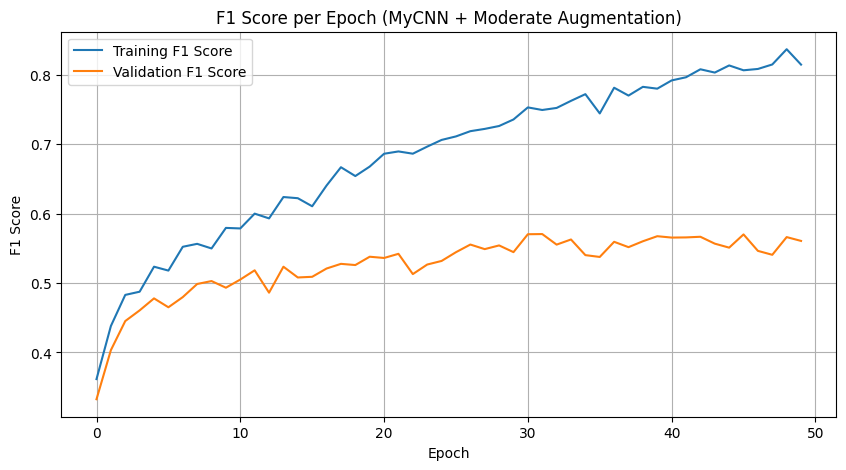

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
Final Test F1 Score (MyCNN + Moderate Augmentation): 0.5562


In [ ]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

# Define model class
class MyCNN(tf.keras.Model):
    def __init__(self, num_classes=20, dropout_rate=0.7):
        super().__init__()
        self.net = tf.keras.Sequential([
            tf.keras.layers.Resizing(224, 224),
            tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(num_classes)
        ])

    def call(self, x):
        return self.net(x)

# Moderate augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow(x_train, y_train, batch_size=64)
steps_per_epoch = np.ceil(len(x_train) / 64).astype(int)

# Compile model
model = MyCNN(num_classes=20, dropout_rate=0.7)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# F1 callback
f1_callback = F1ScoreCallback(x_train, y_train, x_val, y_val, batch_size=64)

# Fit
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[f1_callback],
    verbose=1
)

# Plot F1 curves
plt.figure(figsize=(10, 5))
plt.plot(f1_callback.train_f1_scores, label='Training F1 Score')
plt.plot(f1_callback.val_f1_scores, label='Validation F1 Score')
plt.title('F1 Score per Epoch (MyCNN + Moderate Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

# Test F1 score
y_test_pred = model.predict(x_test, batch_size=64)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
test_f1 = f1_score(y_test.squeeze(), y_test_pred_classes, average='macro')
print(f"Final Test F1 Score (MyCNN + Moderate Augmentation): {test_f1:.4f}")


#Aggressive Augmentation + Dropout 0.7

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Epoch 1: Train F1: 0.3077, Val F1: 0.3080
133/133 ━━━━━━━━━━━━━━━━━━━━ 37s 256ms/step - loss: 3.0859 - sparse_categorical_accuracy: 0.1428 - val_loss: 2.1302 - val_sparse_categorical_accuracy: 0.3447
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Epoch 2: Train F1: 0.3979, Val F1: 0.3875
133/133 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - loss: 2.2610 - sparse_categorical_accuracy: 0.3172 - val_loss: 1.9196 - val_sparse_categorical_accuracy: 0.3987
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Epoch 3: Train F1: 0.3900, Val F1: 0.3758
133/133 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - loss: 2.1141 - sparse_categorical_accuracy: 0.3477 - val_loss: 1.9096 - val_sparse_categorical_accuracy: 0.3993
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Epoch 4: Train F1: 0.4290, V

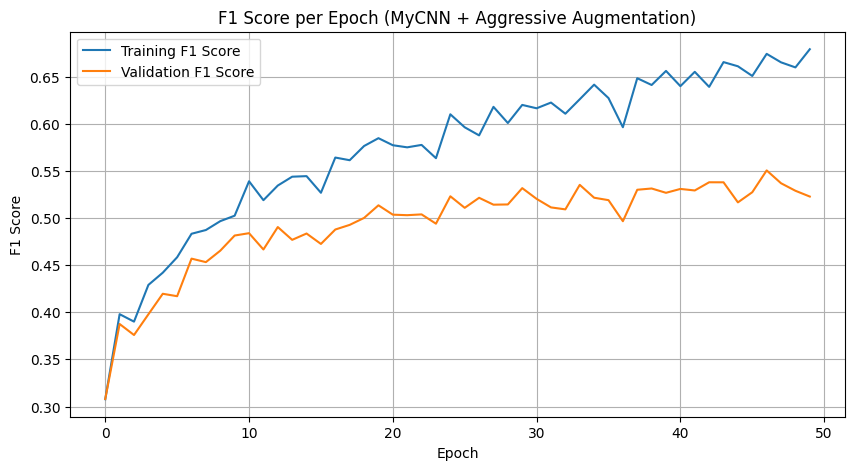

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step
Final Test F1 Score (MyCNN + Aggressive Augmentation): 0.5237


In [ ]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

# Define model class
class MyCNN(tf.keras.Model):
    def __init__(self, num_classes=20, dropout_rate=0.7):
        super().__init__()
        self.net = tf.keras.Sequential([
            tf.keras.layers.Resizing(224, 224),
            tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(num_classes)
        ])

    def call(self, x):
        return self.net(x)

# Aggressive augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    zoom_range=0.3
)

train_generator = datagen.flow(x_train, y_train, batch_size=64)
steps_per_epoch = np.ceil(len(x_train) / 64).astype(int)

# Compile model
model = MyCNN(num_classes=20, dropout_rate=0.7)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# F1 callback
f1_callback = F1ScoreCallback(x_train, y_train, x_val, y_val, batch_size=64)

# Fit
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[f1_callback],
    verbose=1
)

# Plot F1 curves
plt.figure(figsize=(10, 5))
plt.plot(f1_callback.train_f1_scores, label='Training F1 Score')
plt.plot(f1_callback.val_f1_scores, label='Validation F1 Score')
plt.title('F1 Score per Epoch (MyCNN + Aggressive Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

# Test F1 score
y_test_pred = model.predict(x_test, batch_size=64)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
test_f1 = f1_score(y_test.squeeze(), y_test_pred_classes, average='macro')
print(f"Final Test F1 Score (MyCNN + Aggressive Augmentation): {test_f1:.4f}")


#Moderate Augmentation + Dropout 0.5

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Epoch 1: Train F1: 0.3560, Val F1: 0.3480
133/133 ━━━━━━━━━━━━━━━━━━━━ 35s 234ms/step - loss: 2.9541 - sparse_categorical_accuracy: 0.1777 - val_loss: 2.0284 - val_sparse_categorical_accuracy: 0.3720
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Epoch 2: Train F1: 0.4247, Val F1: 0.3965
133/133 ━━━━━━━━━━━━━━━━━━━━ 25s 120ms/step - loss: 2.0725 - sparse_categorical_accuracy: 0.3580 - val_loss: 1.8638 - val_sparse_categorical_accuracy: 0.4147
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Epoch 3: Train F1: 0.4574, Val F1: 0.4259
133/133 ━━━━━━━━━━━━━━━━━━━━ 23s 138ms/step - loss: 1.9637 - sparse_categorical_accuracy: 0.3893 - val_loss: 1.7684 - val_sparse_categorical_accuracy: 0.4427
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Epoch 4: Train F1: 0.4588, V

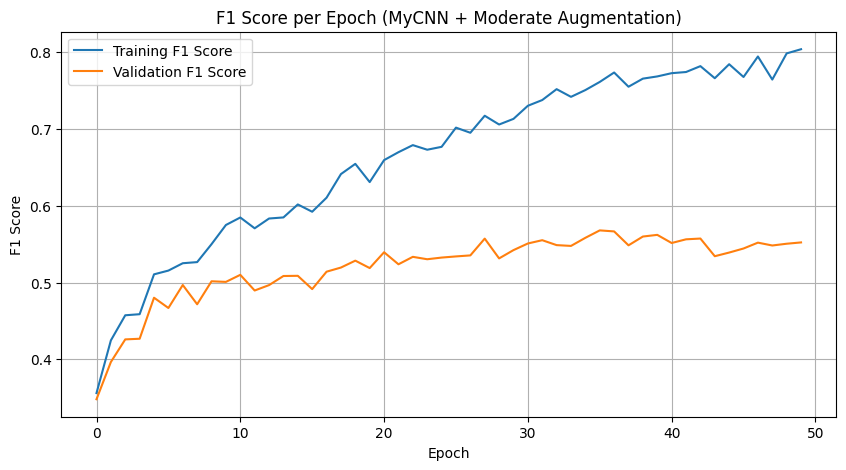

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
Final Test F1 Score (MyCNN + Moderate Augmentation): 0.5762


In [ ]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

# Define model class
class MyCNN(tf.keras.Model):
    def __init__(self, num_classes=20, dropout_rate=0.5):
        super().__init__()
        self.net = tf.keras.Sequential([
            tf.keras.layers.Resizing(224, 224),
            tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D(2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(num_classes)
        ])

    def call(self, x):
        return self.net(x)

# Moderate augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow(x_train, y_train, batch_size=64)
steps_per_epoch = np.ceil(len(x_train) / 64).astype(int)

# Compile model
model = MyCNN(num_classes=20, dropout_rate=0.5)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# F1 callback
f1_callback = F1ScoreCallback(x_train, y_train, x_val, y_val, batch_size=64)

# Fit
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[f1_callback],
    verbose=1
)

# Plot F1 curves
plt.figure(figsize=(10, 5))
plt.plot(f1_callback.train_f1_scores, label='Training F1 Score')
plt.plot(f1_callback.val_f1_scores, label='Validation F1 Score')
plt.title('F1 Score per Epoch (MyCNN + Moderate Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

# Test F1 score
y_test_pred = model.predict(x_test, batch_size=64)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
test_f1 = f1_score(y_test.squeeze(), y_test_pred_classes, average='macro')
print(f"Final Test F1 Score (MyCNN + Moderate Augmentation): {test_f1:.4f}")


# Step 2: Evaluation of Results

The evaluation is based on:
- The F1 score on the validation set (per epoch, stabilization)
- The final F1 score on the test set (generalization to unseen data)

---

## Comparison of Basic Dropout Without Augmentation

| Model         | Best Val F1 (approx.) | Final Test F1 |
|---------------|------------------------|----------------|
| Dropout 0.3   | ~0.53                  | 0.5280         |
| Dropout 0.5   | ~0.54                  | 0.5157         |
| Dropout 0.7   | ~0.53                  | 0.5368         |

**Observation:**  
The models without augmentation stabilize around 0.52–0.53 in validation F1, with Dropout 0.7 slightly leading in test F1.  
However, all models show signs of overfitting (Train F1 = 1.0, Val F1 stuck lower).

---

## Comparison with Light Augmentation (Dropout 0.7)

| Model                  | Best Val F1 (approx.) | Final Test F1 |
|------------------------|------------------------|----------------|
| Light Aug + Dropout 0.7 | ~0.57                 | 0.5528         |

**Observation:**  
Light augmentation significantly improves validation F1 (reaching ~0.57) and raises the test F1 to 0.5528, surpassing all plain models.  
So even light augmentation enhances generalization.

---

## Comparison with Moderate Augmentation

| Model                        | Best Val F1 (approx.) | Final Test F1 |
|-----------------------------|------------------------|----------------|
| Moderate Aug + Dropout 0.7  | ~0.57                  | 0.5562         |
| Moderate Aug + Dropout 0.5  | ~0.57                  | **0.5762**     |

**Observation:**  
With moderate augmentation, validation F1 stabilizes high (~0.56–0.57), but Dropout 0.5 clearly surpasses 0.57 on the test set —  
delivering the **best overall generalization**.  
So, moderate augmentation + Dropout 0.5 is the top performer.

---

## Comparison with Aggressive Augmentation

| Model                          | Best Val F1 (approx.) | Final Test F1 |
|--------------------------------|------------------------|----------------|
| Aggressive Aug + Dropout 0.7   | ~0.55                  | 0.5237         |

**Observation:**  
With very intense augmentation, validation F1 does not exceed 0.55 and test F1 drops (0.5237),  
indicating that excessive augmentation “blurs” the data and hampers learning.

---

## Final Evaluation

Using data augmentation **clearly improves** performance compared to plain models.  
**Moderate augmentation + Dropout 0.5** yields the best test F1 score (0.5762), making it the model that generalizes best.  
Light augmentation also provides a notable boost, though not as much as moderate.  
Aggressive augmentation does not help and likely burdens the network instead.


#Question 3

#VGG19 — Freeze Base, Train Head

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 47s 350ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 344ms/step
Epoch 1: Train F1: 0.7337, Val F1: 0.7005
133/133 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - loss: 2.7240 - sparse_categorical_accuracy: 0.4165 - val_loss: 0.9175 - val_sparse_categorical_accuracy: 0.7007
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 46s 343ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step
Epoch 2: Train F1: 0.7657, Val F1: 0.7486
133/133 ━━━━━━━━━━━━━━━━━━━━ 121s 915ms/step - loss: 1.3004 - sparse_categorical_accuracy: 0.6000 - val_loss: 0.8188 - val_sparse_categorical_accuracy: 0.7507
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 46s 344ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 332ms/step
Epoch 3: Train F1: 0.7689, Val F1: 0.7360
133/133 ━━━━━━━━━━━━━━━━━━━━ 121s 916ms/step - loss: 1.2233 - sparse_categorical_accuracy: 0.6236 - val_loss: 0.8173 - val_sparse_categorical_accuracy: 0.7393
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 46s 344ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step
Epoch 4: Train F

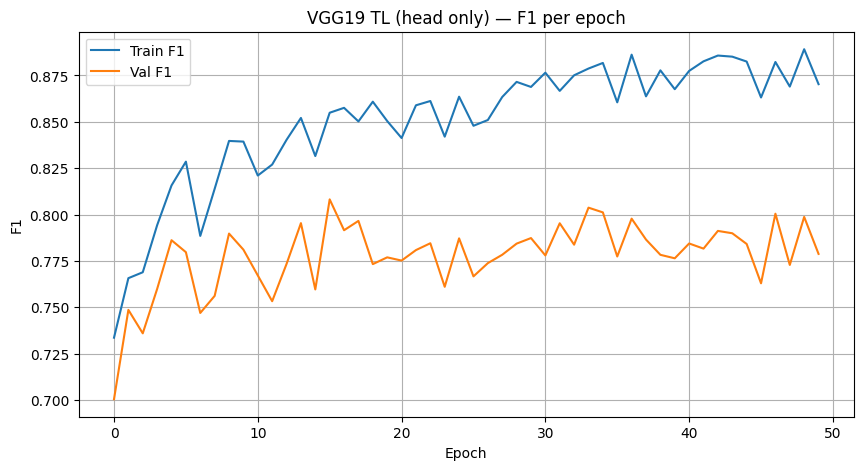

32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 540ms/step
Final Test F1 (VGG19 head only): 0.7682


In [ ]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

# --- 0) Resize + scale back to [0..255] + preprocess_input ---
# We currently have x_train, x_val, x_test in [0..1] float
# Instead of that, it's better to start from the original uint8 images:
#   x_train_ds, x_val_ds, x_test_ds in uint8 [0..255]

# 0.1) Convert the splits we already have:
x_train_uint8 = (x_train * 255).astype('uint8')
x_val_uint8   = (x_val   * 255).astype('uint8')
x_test_uint8  = (x_test  * 255).astype('uint8')

# 0.2) Resize
x_train_resized = tf.image.resize(x_train_uint8, (224, 224)).numpy()
x_val_resized   = tf.image.resize(x_val_uint8,   (224, 224)).numpy()
x_test_resized  = tf.image.resize(x_test_uint8,  (224, 224)).numpy()

# 0.3) preprocess_input: performs BGR conversion + mean subtraction
x_train_prep = preprocess_input(x_train_resized)
x_val_prep   = preprocess_input(x_val_resized)
x_test_prep  = preprocess_input(x_test_resized)

# --- 1) Load VGG19 without top, freeze the base ---
base_model = VGG19(weights='imagenet', include_top=False,
                   input_shape=(224,224,3))
base_model.trainable = False

# --- 2) Define new head ---
inputs = tf.keras.Input(shape=(224,224,3), dtype='float32')
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
# softmax activation to get probability distribution
outputs = tf.keras.layers.Dense(20, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# --- 3) Compile with more aggressive learning rate ---
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# --- 4) F1 callback (left unchanged) ---
f1_callback = F1ScoreCallback(x_train_prep, y_train,
                              x_val_prep, y_val, batch_size=64)

# --- 5) Training ---
history = model.fit(
    x_train_prep, y_train,
    validation_data=(x_val_prep, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[f1_callback],
    verbose=1
)

# --- 6) Plot F1 curves ---
plt.figure(figsize=(10,5))
plt.plot(f1_callback.train_f1_scores, label='Train F1')
plt.plot(f1_callback.val_f1_scores,   label='Val F1')
plt.title('VGG19 TL (head only) — F1 per epoch')
plt.xlabel('Epoch'); plt.ylabel('F1'); plt.legend(); plt.grid(True)
plt.show()

# --- 7) Final Test F1 ---
y_test_pred = model.predict(x_test_prep, batch_size=64)
y_test_lbls = np.argmax(y_test_pred, axis=1)
test_f1 = f1_score(y_test.squeeze(), y_test_lbls, average='macro')
print(f"Final Test F1 (VGG19 head only): {test_f1:.4f}")


# (VGG19) – Part B: unfreeze the “last” layers


Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 48s 354ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 344ms/step
Epoch 1: Train F1: 0.4995, Val F1: 0.4751
133/133 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - loss: 3.1822 - sparse_categorical_accuracy: 0.1145 - val_loss: 1.6753 - val_sparse_categorical_accuracy: 0.5233
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 46s 343ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step
Epoch 2: Train F1: 0.7564, Val F1: 0.7288
133/133 ━━━━━━━━━━━━━━━━━━━━ 128s 964ms/step - loss: 1.6752 - sparse_categorical_accuracy: 0.4884 - val_loss: 0.8721 - val_sparse_categorical_accuracy: 0.7360
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 46s 344ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 332ms/step
Epoch 3: Train F1: 0.8861, Val F1: 0.8041
133/133 ━━━━━━━━━━━━━━━━━━━━ 128s 965ms/step - loss: 0.9448 - sparse_categorical_accuracy: 0.7095 - val_loss: 0.6318 - val_sparse_categorical_accuracy: 0.8060
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 46s 344ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step
Epoch 4: Train F

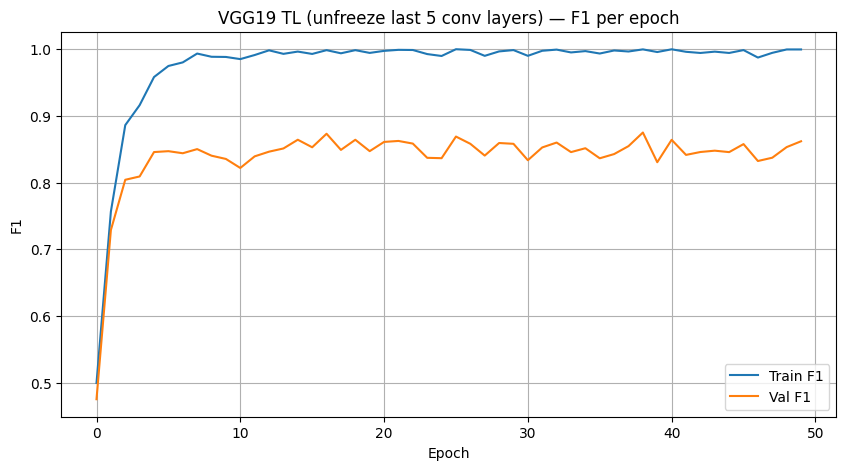

32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 547ms/step
Final Test F1 (VGG19, unfreeze last5): 0.8440


In [ ]:
# ────────── Transfer Learning (VGG19) – Part B: Unfreeze “last” layers ──────────

# 0) Imports & assume x_train, y_train, x_val, y_val, x_test, y_test already in memory
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

# 1) Data preprocessing for VGG19
# (if you already have x_* in [0..1], convert back to uint8 [0..255] and apply preprocess_input)
x_train_uint8 = (x_train * 255).astype('uint8')
x_val_uint8   = (x_val   * 255).astype('uint8')
x_test_uint8  = (x_test  * 255).astype('uint8')

# Resize to 224×224
x_train_resized = tf.image.resize(x_train_uint8, (224, 224)).numpy()
x_val_resized   = tf.image.resize(x_val_uint8,   (224, 224)).numpy()
x_test_resized  = tf.image.resize(x_test_uint8,  (224, 224)).numpy()

# BGR mean subtraction & scaling as required by VGG19
x_train_prep = preprocess_input(x_train_resized)
x_val_prep   = preprocess_input(x_val_resized)
x_test_prep  = preprocess_input(x_test_resized)

# 2) Load VGG19 base (without top) & freeze all layers
base_model = VGG19(weights='imagenet', include_top=False,
                   input_shape=(224,224,3))
base_model.trainable = False

# 3) Unfreeze the last 5 convolutional layers of the base
for layer in base_model.layers[-5:]:
    if isinstance(layer, tf.keras.layers.Conv2D):
        layer.trainable = True

# 4) Construct new classification head
inputs = tf.keras.Input(shape=(224,224,3), dtype='float32')
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(20, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

# 5) Compile with lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# 6) F1 callback
f1_callback = F1ScoreCallback(
    x_train_prep, y_train,
    x_val_prep,   y_val,
    batch_size=64
)

# 7) Training
history = model.fit(
    x_train_prep, y_train,
    validation_data=(x_val_prep, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[f1_callback],
    verbose=1
)

# 8) Plot F1 curves
plt.figure(figsize=(10,5))
plt.plot(f1_callback.train_f1_scores, label='Train F1')
plt.plot(f1_callback.val_f1_scores,   label='Val F1')
plt.title('VGG19 TL (unfreeze last 5 conv layers) — F1 per epoch')
plt.xlabel('Epoch'); plt.ylabel('F1'); plt.legend(); plt.grid(True)
plt.show()

# 9) Final Test F1
y_test_pred   = model.predict(x_test_prep, batch_size=64)
y_test_labels = np.argmax(y_test_pred, axis=1)
test_f1 = f1_score(y_test.squeeze(), y_test_labels, average='macro')
print(f"Final Test F1 (VGG19, unfreeze last5): {test_f1:.4f}")


#EfficientNetB0 – Head Only

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step
Epoch 1: Train F1: 0.8302, Val F1: 0.8205
133/133 ━━━━━━━━━━━━━━━━━━━━ 88s 513ms/step - loss: 1.9392 - sparse_categorical_accuracy: 0.4701 - val_loss: 0.6522 - val_sparse_categorical_accuracy: 0.8220
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
Epoch 2: Train F1: 0.8648, Val F1: 0.8428
133/133 ━━━━━━━━━━━━━━━━━━━━ 32s 240ms/step - loss: 0.6818 - sparse_categorical_accuracy: 0.8091 - val_loss: 0.5116 - val_sparse_categorical_accuracy: 0.8440
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
Epoch 3: Train F1: 0.8816, Val F1: 0.8558
133/133 ━━━━━━━━━━━━━━━━━━━━ 32s 243ms/step - loss: 0.5208 - sparse_categorical_accuracy: 0.8425 - val_loss: 0.4614 - val_sparse_categorical_accuracy: 0.8573
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
Epoch 4: Train F1: 0.8951

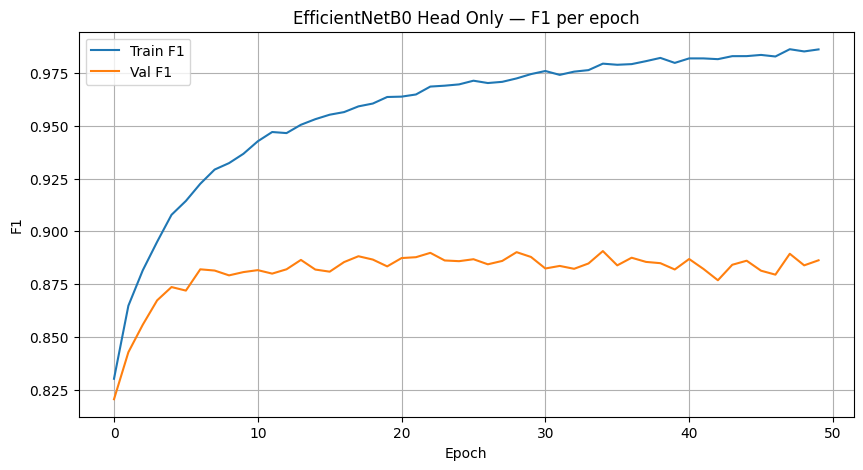

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step

Final Test F1 (EffNetB0 head only): 0.8770


In [ ]:
# ------------------------------------
# EfficientNetB0 Transfer Learning
# ------------------------------------
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# (A) Existing data in [0,1]:
#     x_train, y_train, x_val, y_val, x_test, y_test

# (B) Restore & apply official preprocessing
x_train_proc = preprocess_input(x_train * 255.0)
x_val_proc   = preprocess_input(x_val   * 255.0)
x_test_proc  = preprocess_input(x_test  * 255.0)

# (C) Resize to 224×224
x_train_res = tf.image.resize(x_train_proc, [224, 224]).numpy()
x_val_res   = tf.image.resize(x_val_proc,   [224, 224]).numpy()
x_test_res  = tf.image.resize(x_test_proc,  [224, 224]).numpy()

# (D) Load EfficientNetB0 without top, freeze base
inp = Input(shape=(224,224,3))
base = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=inp)
base.trainable = False

# (E) Define new classification head
x = base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
out = Dense(20)(x)

model_head = Model(inp, out)

# (F) Compile
model_head.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# (G) Fit with F1 callback
steps = int(np.ceil(len(x_train_res) / 64))
f1_cb = F1ScoreCallback(x_train_res, y_train, x_val_res, y_val, batch_size=64)

history = model_head.fit(
    x_train_res, y_train,
    epochs=50,
    batch_size=64,
    steps_per_epoch=steps,
    validation_data=(x_val_res, y_val),
    callbacks=[f1_cb],
    verbose=1
)

# (H) Plot F1 curves
plt.figure(figsize=(10,5))
plt.plot(f1_cb.train_f1_scores, label='Train F1')
plt.plot(f1_cb.val_f1_scores,   label='Validation F1')
plt.title('EfficientNetB0 Head Only — F1 per Epoch')
plt.xlabel('Epoch'); plt.ylabel('F1'); plt.legend(); plt.grid(True)
plt.show()

# (I) Final evaluation on the test set
y_pred_test = model_head.predict(x_test_res, batch_size=64)
y_cls       = np.argmax(y_pred_test, axis=1)
test_f1     = f1_score(y_test.squeeze(), y_cls, average='macro')
print(f"\nFinal Test F1 (EffNetB0 head only): {test_f1:.4f}")


#EfficientNetB0 unfreeze last 20 layers

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step
Epoch 1: Train F1: 0.8198, Val F1: 0.8011
133/133 ━━━━━━━━━━━━━━━━━━━━ 100s 544ms/step - loss: 2.3680 - sparse_categorical_accuracy: 0.3545 - val_loss: 0.7586 - val_sparse_categorical_accuracy: 0.8027
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
Epoch 2: Train F1: 0.8813, Val F1: 0.8544
133/133 ━━━━━━━━━━━━━━━━━━━━ 33s 246ms/step - loss: 0.7940 - sparse_categorical_accuracy: 0.8050 - val_loss: 0.4783 - val_sparse_categorical_accuracy: 0.8567
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
Epoch 3: Train F1: 0.9089, Val F1: 0.8715
133/133 ━━━━━━━━━━━━━━━━━━━━ 33s 249ms/step - loss: 0.5206 - sparse_categorical_accuracy: 0.8520 - val_loss: 0.4011 - val_sparse_categorical_accuracy: 0.8733
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step
24/24 ━━━━━━━

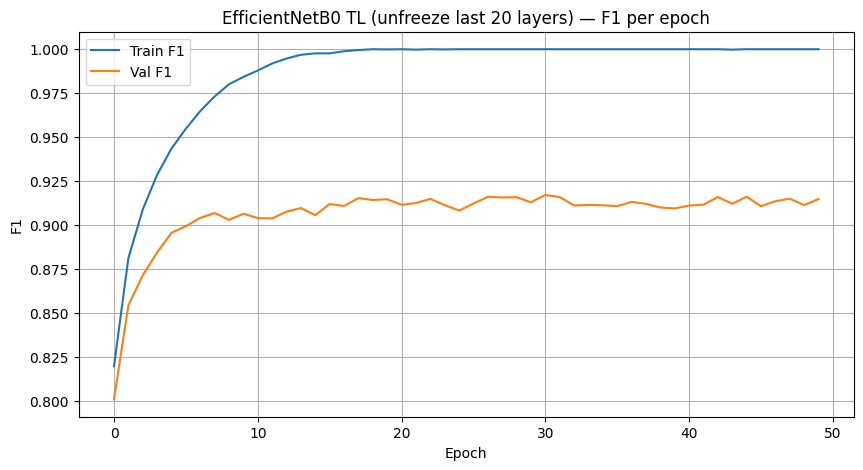

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step

Final Test F1 (EffNetB0 unfreeze last 20): 0.9136


In [ ]:
# --------------------------------------------
# EfficientNetB0 Transfer Learning (unfreeze last 20 layers)
# --------------------------------------------
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# ASSUMPTION: You already have in your namespace:
# x_train, y_train, x_val, y_val, x_test, y_test in [0,1] range
# And the class F1ScoreCallback defined

# -------------------------------
# 1) Preprocess & Resize inputs
# -------------------------------
# 1.1 Apply official preprocess_input (convert 0–1 → model’s expected format)
x_train_p = preprocess_input(x_train * 255.0)
x_val_p   = preprocess_input(x_val   * 255.0)
x_test_p  = preprocess_input(x_test  * 255.0)

# 1.2 Resize all to 224×224
x_train_r = tf.image.resize(x_train_p, [224, 224]).numpy()
x_val_r   = tf.image.resize(x_val_p,   [224, 224]).numpy()
x_test_r  = tf.image.resize(x_test_p,  [224, 224]).numpy()

# -------------------------------
# 2) Load EfficientNetB0 base and freeze all layers
# -------------------------------
inp = Input(shape=(224, 224, 3))
base = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=inp)
base.trainable = False

# -------------------------------
# 3) Unfreeze only the last 20 layers
# -------------------------------
for layer in base.layers[-20:]:
    layer.trainable = True

# -------------------------------
# 4) Add classification head
# -------------------------------
x = base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
out = Dense(20)(x)  # num_classes = 20
model_tl = Model(inp, out)

# -------------------------------
# 5) Compile
# -------------------------------
model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # smaller LR for fine-tuning
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# -------------------------------
# 6) Setup F1 callback
# -------------------------------
steps = int(np.ceil(len(x_train_r) / 64))
f1_cb_tl = F1ScoreCallback(x_train_r, y_train, x_val_r, y_val, batch_size=64)

# -------------------------------
# 7) Train the model
# -------------------------------
history_tl = model_tl.fit(
    x_train_r, y_train,
    epochs=50,
    batch_size=64,
    steps_per_epoch=steps,
    validation_data=(x_val_r, y_val),
    callbacks=[f1_cb_tl],
    verbose=1
)

# -------------------------------
# 8) Plot F1 curves
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(f1_cb_tl.train_f1_scores, label='Train F1')
plt.plot(f1_cb_tl.val_f1_scores,   label='Validation F1')
plt.title('EfficientNetB0 TL (unfreeze last 20 layers) — F1 per Epoch')
plt.xlabel('Epoch'); plt.ylabel('F1'); plt.legend(); plt.grid(True)
plt.show()

# -------------------------------
# 9) Final Test F1 Score
# -------------------------------
y_pred_test = model_tl.predict(x_test_r, batch_size=64)
y_pred_cls  = np.argmax(y_pred_test, axis=1)
final_f1 = f1_score(y_test.squeeze(), y_pred_cls, average='macro')
print(f"\nFinal Test F1 (EffNetB0 unfreeze last 20): {final_f1:.4f}")


# Step 2 — Evaluation of Results (Question 3)

In this step, we compare the **four transfer learning models** we ran, using the **F1 score** on the validation and test sets as the main comparison metric to determine which model generalizes best.

---

## Summary of Results

| Model                                   | Final Val F1    | Final Test F1    |
|----------------------------------------|------------------|------------------|
| **VGG19 — Freeze Base, Train Head**     | ~0.80            | 0.7682           |
| **VGG19 — Unfreeze last layers**        | ~0.86–0.87       | 0.8440           |
| **EfficientNetB0 — Train Head Only**    | ~0.88–0.89       | 0.8770           |
| **EfficientNetB0 — Unfreeze last 20**   | ~0.91–0.92       | 0.9136           |

---

## Observations

**Performance improvement with fine-tuning:**
- When we unfreeze some of the last layers of the convolutional backbone instead of freezing it entirely, the model improves significantly.
- For VGG19, unfreezing increased test F1 from ~0.77 to ~0.84.
- For EfficientNetB0, unfreezing increased test F1 from ~0.88 to ~0.91.

**Best overall performance:**
- **EfficientNetB0 with fine-tuning of the last 20 layers** achieved the highest test F1 score (~0.9136), outperforming all other models.
- This shows that a more modern architectural model like EfficientNetB0 is more powerful for this problem.

**Validation vs. test consistency:**
- The validation and test F1 scores are close in all models, which indicates that we are not significantly overfitting to the validation set.

---

## Conclusion

Based on the results:
- The best-performing model is **EfficientNetB0 with the last 20 layers unfrozen**, because:
  - It achieved the highest F1 score on the validation set (~0.91–0.92).
  - It achieved the best F1 score on the test set (0.9136).
  - It continues to train important features in the convolutional base, rather than relying solely on the classification head.
